In [6]:
from importlib import reload

In [15]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('../diagnostics/')
import model_diagnostics; reload(model_diagnostics)
from model_diagnostics import ModelDiagnostics
import xarray as xr

In [16]:
model_dir = '/export/home/srasp/repositories/CBRAIN-Keras-Diagnostics/keras_network/models/'
model_path = model_dir + '002_purecrm_sample.h5'

In [17]:
pre_dir = '/beegfs/DATA/pritchard/srasp/preprocessed_data/'

In [18]:
diag = ModelDiagnostics(
    model_path, 
    pre_dir + 'pure_crm_essentials_valid_month02_features.nc',
    pre_dir + 'pure_crm_essentials_valid_month02_targets.nc',
    pre_dir + 'pure_crm_essentials_train_month01_norm.nc'
)

In [19]:
diag.compute_stats(25, compute_SPDT_SPDQ=True)


  0%|          | 0/25 [00:00<?, ?it/s]

Generator will have 11001856 samples in 1343 batches
Features have shape 152; targets have shape 120



100%|██████████| 25/25 [00:02<00:00,  8.60it/s]

Mean absolute energy violation. True: 3.18906278865
Mean absolute energy violation. Pred: 9.18637347243


In [6]:
%debug

> /data11/home/srasp/repositories/CBRAIN-Keras-Diagnostics/diagnostics/model_diagnostics.py(196)compute_stats()
    194             if compute_SPDT_SPDQ:
    195                 tmp = self._compute_SPDT_SPDQ(f, t, p)
--> 196                 SPpred += tmp[0]; SPtrue += tmp[0]
    197 
    198         # Compute average statistics

ipdb> tmp
(array([ 0.00189287,  0.00137764,  0.0067409 , ...,  0.00047284,
        0.00085891,  0.00021275]), array([  1.36768708e-02,   4.77900344e-03,   2.09069238e-02, ...,
         8.56082788e-03,   1.18737822e-03,   2.27844095e-06]))
ipdb> tmp[0].shape
(8192,)
ipdb> q


In [6]:
diag.mean_stats()

../diagnostics/model_diagnostics.py:200: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


,bias,mse,pred_var,true_var,expl_var_cut9
SPDQ,8.97017e-10,1.31079e-15,7.74555e-16,2.14837e-15,0.449058
SPDT,-1.20747e-06,1.11037e-09,9.89376e-10,2.16518e-09,0.412074
QRL,1.20576e-06,1.9578e-10,9.44383e-11,2.93455e-10,0.357524
QRS,-3.73773e-07,2.91654e-11,1.51689e-10,1.89711e-10,0.641702
all,-9.3648e-08,3.33829e-10,3.08876e-10,6.62086e-10,0.465089


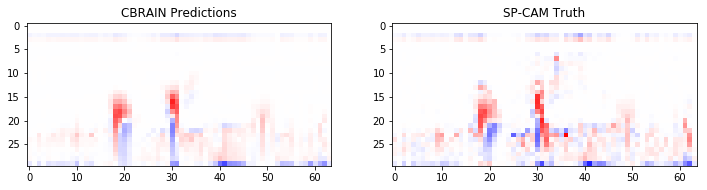

In [7]:
diag.plot_double_lat_lev_slice('SPDT', 1, 0, vmin=-5e-4, vmax=5e-4, cmap='bwr')

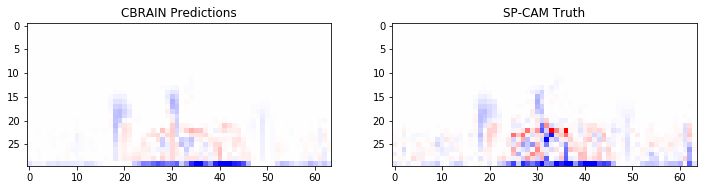

In [8]:
diag.plot_double_lat_lev_slice('SPDQ', 1, 0, vmin=-5e-7, vmax=5e-7, cmap='bwr')

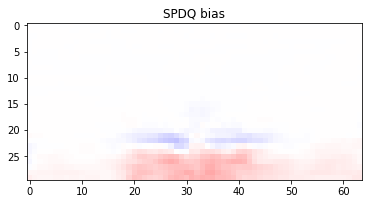

In [13]:
diag.plot_stat_lat_lev_mean('bias', 'SPDQ', vmin=-5e-8, vmax=5e-8, cmap='bwr')

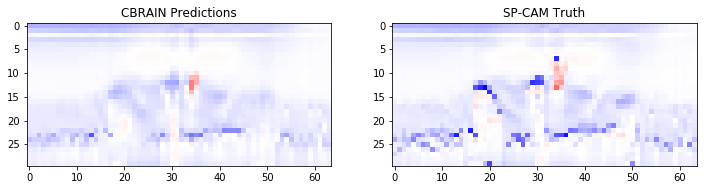

In [15]:
diag.plot_double_lat_lev_slice('QRL', 1, 0, vmin=-2e-4, vmax=2e-4, cmap='bwr')

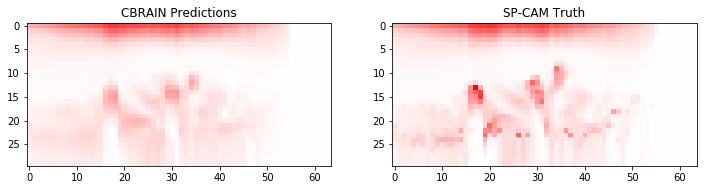

In [18]:
diag.plot_double_lat_lev_slice('QRS', 20, 0, vmin=-2e-4, vmax=2e-4, cmap='bwr')

In [4]:
diag2 = ModelDiagnostics(
    model_dir + '001_fullphy_sample.h5', 
    pre_dir + 'full_physics_essentials_valid_month02_features.nc',
    pre_dir + 'full_physics_essentials_valid_month02_targets.nc',
    pre_dir + 'full_physics_essentials_train_month01_norm.nc'
)

In [12]:
diag2.compute_stats()
diag2.mean_stats()

Generator will have 11001856 samples in 1343 batches
Features have shape 92; targets have shape 60


100%|██████████| 1343/1343 [00:41<00:00, 32.27it/s]
../diagnostics/model_diagnostics.py:200: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(self.reshape_output(self.true_var, v, unscale=False), axis=(0, 1))


,bias,mse,pred_var,true_var,expl_var_cut9
TPHYSTND,-4.70319e-07,1.26762e-09,9.15268e-10,2.14344e-09,0.400922
PHQ,8.25027e-10,1.29071e-15,2.52626e-16,1.58293e-15,0.400057
all,-2.34747e-07,6.33811e-10,4.57634e-10,1.07172e-09,0.40049


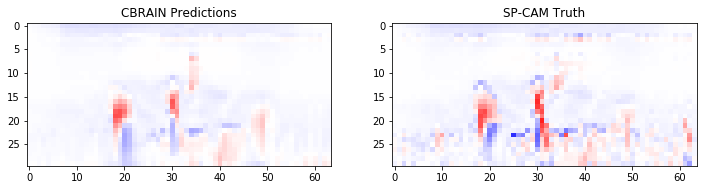

In [6]:
diag2.plot_double_lat_lev_slice('TPHYSTND', 1, 0, vmin=-5e-4, vmax=5e-4, cmap='bwr')

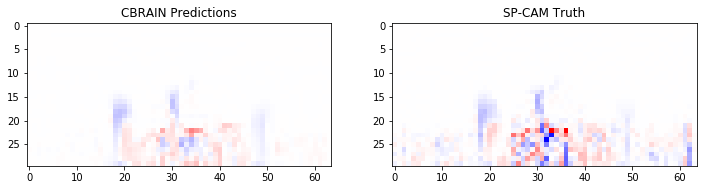

In [9]:
diag2.plot_double_lat_lev_slice('PHQ', 1, 0, vmin=-5e-7, vmax=5e-7, cmap='bwr')

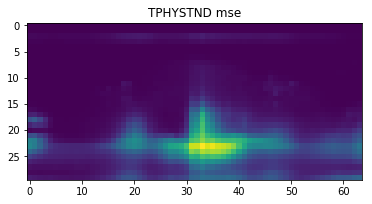

In [13]:
diag2.plot_stat_lat_lev_mean('mse', 'TPHYSTND')

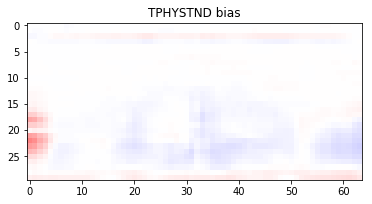

In [20]:
diag2.plot_stat_lat_lev_mean('bias', 'TPHYSTND', vmin=-1e-7, vmax=1e-7, cmap='bwr')